# Gradient descent principles
#### Flàvia Ferrús and David Rosado

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### **1.Gradient descent methods**

### 1.1. A simple quadratic function

We begin with a simple two-dimensional function, namely $f(x_1,x_2)=x_1^2+x_2^2$. Let us plot the function to get familiarize with it.

In [4]:
def f(x,y):
    return x**2 + y**2

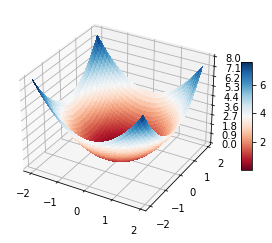

In [5]:
#Plot of the function
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
from matplotlib import cm
import pylab

x=np.arange(-2,2, 0.1)
y=np.arange(-2,2, 0.1)
X, Y = pylab.meshgrid(x,y)
Z= f(X,Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

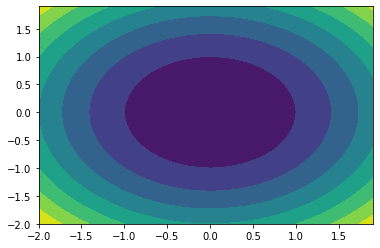

In [6]:
#Contour plot
fig, ax = plt.subplots()
ax.contourf(X, Y, Z)

plt.show()

We begin some experiments with gradient descent using a constant step
\begin{align*}
\textbf{x}^{k+1}=\textbf{x}^k-\alpha^k\nabla f(\textbf{x}^k)
\end{align*}

#### 1.Implement the previous algorithm with a constant $\alpha^k=0.1$ parameter.

In [7]:
#We compute the gradient of the function
def grad_f(x,y):
  return np.array([2*x, 2*y])

In [126]:
#We compute the gradient descent method fixing alpha
alpha=0.1
x_0=[1,5]
x_path=np.zeros(101)
y_path=np.zeros(101)
x_path[0]=x_0[0]
y_path[0]=x_0[1]
print('Starting point:',(x_0[0],x_0[1]))
for i in range(0,100):
  x_k=x_0-alpha*grad_f(x_0[0],x_0[1])
  x_0=x_k
  x_path[i]=x_k[0]
  y_path[i]=x_k[1]
  print(x_k)

Starting point: (1, 5)
[0.8 4. ]
[0.64 3.2 ]
[0.512 2.56 ]
[0.4096 2.048 ]
[0.32768 1.6384 ]
[0.262144 1.31072 ]
[0.2097152 1.048576 ]
[0.16777216 0.8388608 ]
[0.13421773 0.67108864]
[0.10737418 0.53687091]
[0.08589935 0.42949673]
[0.06871948 0.34359738]
[0.05497558 0.27487791]
[0.04398047 0.21990233]
[0.03518437 0.17592186]
[0.0281475  0.14073749]
[0.022518   0.11258999]
[0.0180144  0.09007199]
[0.01441152 0.07205759]
[0.01152922 0.05764608]
[0.00922337 0.04611686]
[0.0073787  0.03689349]
[0.00590296 0.02951479]
[0.00472237 0.02361183]
[0.00377789 0.01888947]
[0.00302231 0.01511157]
[0.00241785 0.01208926]
[0.00193428 0.00967141]
[0.00154743 0.00773713]
[0.00123794 0.0061897 ]
[0.00099035 0.00495176]
[0.00079228 0.00396141]
[0.00063383 0.00316913]
[0.00050706 0.0025353 ]
[0.00040565 0.00202824]
[0.00032452 0.00162259]
[0.00025961 0.00129807]
[0.00020769 0.00103846]
[0.00016615 0.00083077]
[0.00013292 0.00066461]
[0.00010634 0.00053169]
[8.50705917e-05 4.25352959e-04]
[6.80564734e-05 3

In [128]:
print(x_path[-2])

2.0370359763344877e-10


The algorithm is always converging to the global minimum of the function, $(0,0)$. Let us draw the path
the gradient descent follows for each of the starting points $x_0$ we have studied.

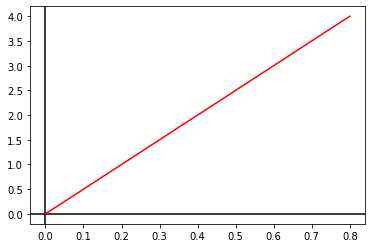

In [9]:
#Draw of the gradient descent follows for each point x_0
#If you change the x_0 value in the before code, we can see the different gradient descent follows
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.axhline(y=0,color='k')
ax.axvline(x=0,color='k')
plt.plot(x_path, y_path, 'r')

In [129]:
## old
def gradDescent( x0, steps, alpha = 0.1):
    x_path=np.zeros(steps)
    y_path=np.zeros(steps)
    x_path[0]=x0[0]
    y_path[0]=x0[1]
    x_0 = x0
    for i in range(0,steps):
        x_k = x_0-alpha*grad_f(x_0[0],x_0[1])
        x_0 = x_k
        #x_k=x0-alpha*grad_f(x0[0],x0[1])
        #x0=x_k
        x_path[i]=x_k[0]
        y_path[i]=x_k[1]
    return x_path, y_path

In [150]:
## old

def plotGrad(x0, steps, alpha=0.1):
    if x0[0] == 0:
        x=np.arange(-1,1, 0.1)
        y=np.arange(-abs(x0[1]),abs(x0[1]), 0.1)
    elif x0[1] == 0:
        x=np.arange(-abs(x0[0]),abs(x0[0]), 0.1)
        y=np.arange(-1,1, 0.1)
    else: 
        x=np.arange(-abs(x0[0]),abs(x0[0]), 0.1)
        y=np.arange(-abs(x0[1]),abs(x0[1]), 0.1)
    X, Y = pylab.meshgrid(x,y)
    Z= f(X,Y)
    x_path, y_path = gradDescent(x0, steps, alpha)
    plt.contourf(X, Y, Z, alpha= .7)
    plt.plot(x_path, y_path, 'r')
    print(x_path[-1], y_path[-1])
    #print(len(x_path))

2.0370359763344877e-10 4.0740719526689754e-10


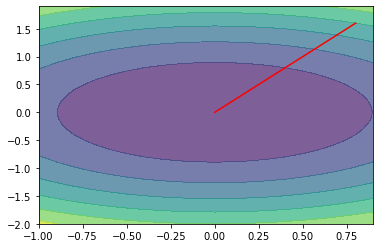

In [131]:
x_0 = [1,2]
plotGrad(x_0, 100)

We can now contrast different number of iterations and different starting points when considering the regular gradient descent method with constant step. 

Note that, evidently, the output is closer to the minimum when more iterations are considered, and when the initial point is already closer to the extreme point we are seeking for, as would be expected by intuition. 

0.10737418240000003 0.21474836480000006


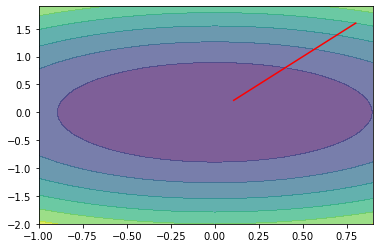

In [132]:
plotGrad([1,2], 10)

0.10737418240000003 0.10737418240000003


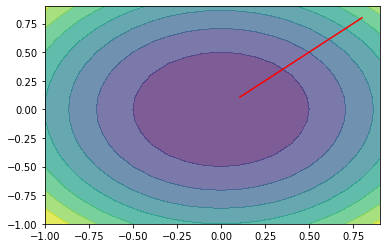

In [133]:
plotGrad([1,1], 10)

2.0370359763344877e-10 2.0370359763344877e-10


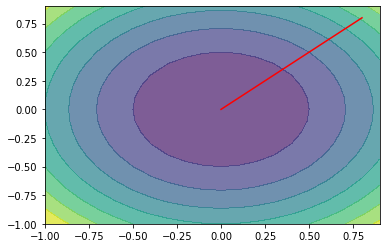

In [134]:
plotGrad([1,1], 100)

1.0185179881672439e-09 6.111107929003464e-10


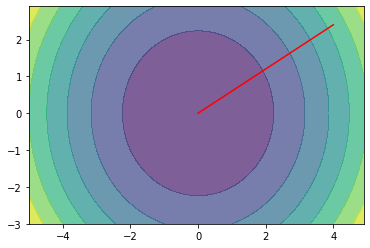

In [135]:
plotGrad([5,3], 100)

#### 2.Try other values of $\alpha$ such as $\alpha^k=1$ or $\alpha^k=2$.

1.0 2.0


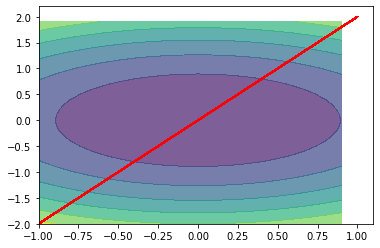

In [136]:
plotGrad([1,2], 100, alpha = 1)

-2.984622845537545e+18 -5.96924569107509e+18


/var/folders/df/4599m83s2vj4j1_h__gx7kqw0000gn/T/ipykernel_1643/2292089701.py:3: RuntimeWarning: overflow encountered in long_scalars
  return np.array([2*x, 2*y])


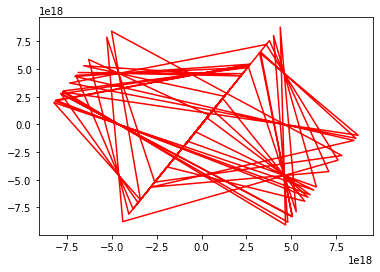

In [137]:
plotGrad([1,2], 100, alpha = 2)

In this case the gradient descent performs poorly due to the too bigger steps.

In [138]:
#We compute the gradient descent method fixing alpha
alpha=1
x_0=[1,1]
x_path=np.zeros(101)
y_path=np.zeros(101)
x_path[0]=x_0[0]
y_path[0]=x_0[1]
print('Starting point:',(x_0[0],x_0[1]))
for i in range(0,100):
  x_k=x_0-alpha*grad_f(x_0[0],x_0[1])
  x_0=x_k
  x_path[i]=x_k[0]
  y_path[i]=x_k[1]
  print(x_k)

Starting point: (1, 1)
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]
[-1 -1]
[1 1]


It does not work!!

### 1.2 A function with a multiple minima

Consider now the following function:
$$ 
f(x_1, x_2) = x_1^2f(\mathbf{x}) = x_1^2(4-2.1x_1^2 + \frac{1}{3}x_1^4) + x_1 x_2 + x_2^2(-4 + 4x_2^2).
$$
Let's first consider the corresponding 3D plot and contour plot:

In [139]:
def f12(x,y):
    return x**2*(4-2.1*x**2 + (1/3)*x**4) + x*y + y**2*(-4+4*y**2)

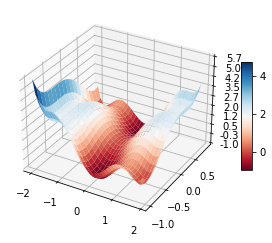

In [140]:
x=np.arange(-2,2, 0.1)
y=np.arange(-1,1, 0.1)
X, Y = pylab.meshgrid(x,y)
Z= f12(X,Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

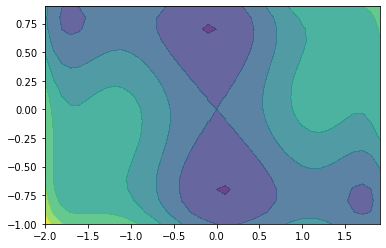

In [141]:
fig, ax = plt.subplots()
ax.contourf(X, Y, Z, alpha= .8)

plt.show()

Note that this function has several local minimums, and therefore the descend algorithm may converge on different minimums depending on the initial valua taken.

#### 1. Let's follow the gradient descent with 100 iterations at different starting points

In [145]:
def grad12(x,y):
    return np.array([2*x*(4-2.1*x**2 + (1/3)*x**4) + x**2*(-2*2.1*x + (4/3)*x**3)+y,
                     x+2*y*(-4+4*y**2) + 8*y**3])

def gradDescent12( x0, steps, alpha = 0.1):
    x_path=np.zeros(steps)
    y_path=np.zeros(steps)
    x_path[0]=x0[0]
    y_path[0]=x0[1]
    x_0 = x0
    for i in range(0,steps):
        x_k = x_0-alpha*grad12(x_0[0],x_0[1])
        x_0 = x_k
        #x_k=x0-alpha*grad12(x0[0],x0[1])
        #x0=x_k
        x_path[i]=x_k[0]
        y_path[i]=x_k[1]
    return x_path, y_path

def plotGrad12(x0, steps, alpha=0.1):
    if x0[0] == 0:
        x=np.arange(-1,1, 0.1)
        y=np.arange(-abs(x0[1]),abs(x0[1]), 0.1)
    elif x0[1] == 0:
        x=np.arange(-abs(x0[0]),abs(x0[0]), 0.1)
        y=np.arange(-1,1, 0.1)
    else: 
        x=np.arange(-abs(x0[0]),abs(x0[0]), 0.1)
        y=np.arange(-abs(x0[1]),abs(x0[1]), 0.1)
    X, Y = pylab.meshgrid(x,y)
    Z= f12(X,Y)
    x_path, y_path = gradDescent12(x0, steps, alpha)
    plt.contourf(X, Y, Z, alpha= .7)
    plt.plot(x_path, y_path, 'r')
    print(x_path[-1], y_path[-1])

-0.08984201310031807 0.7126564030207395


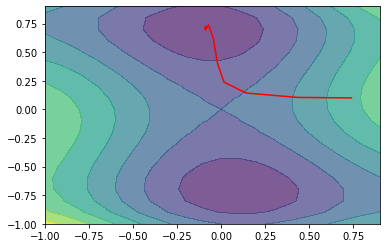

In [146]:
plotGrad12([1,1], 100)

-0.08984201310031807 0.7126564030207395


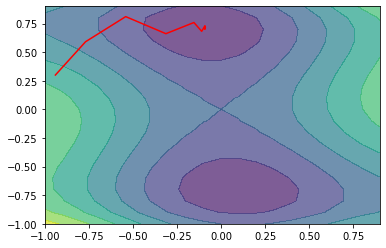

In [147]:
plotGrad12([-1,1], 100)

-0.08984201310031804 0.7126564030207397


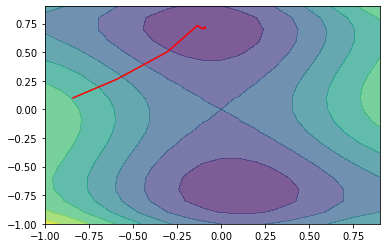

In [148]:
plotGrad12([-1,0], 100)

0.08984201310031807 -0.7126564030207395


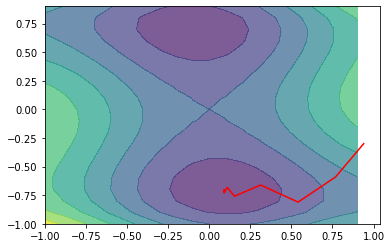

In [149]:
plotGrad12([1,-1], 100)

Note that the algorithm usually converges to the minimum located in the valley to which x0 belongs.

#### 2. Gradient descent with adaptable step size 

Let's consider the double loop procedure to perform the gradient descent adapting the value of the step size:

In [186]:
# Backtracking algorithm with a double loop
def doubleLoop12( x0, thres, maxSteps=100):
    x_path=np.zeros(maxSteps)
    y_path=np.zeros(maxSteps)
    x_path[0]=x0[0]
    y_path[0]=x0[1]
    x_0 = x0
    for i in range(0,maxSteps):
        print('Iteration', i)
        alpha = 1
        x_k = x_0-alpha*grad12(x_0[0],x_0[1])
        print('New value computed:', x_k, f12(x_k[0], x_k[1]))
        print('Old value computed:', x_0, f12(x_0[0], x_0[1]))
        ## Check if the proposed value of alpha reduces the value of f(x_k)
        if f12(x_k[0], x_k[1]) < f(x_0[0], x_0[1]):
            if abs(f12(x_k[0], x_k[1]) - f12(x_k[0], x_k[1]) < thres):
                return x_path[0:i], y_path[0:i]
            else:
                x_0 = x_k
        else: 
            while f12(x_k[0], x_k[1]) > f(x_k[0], x_k[1]):
                alpha = alpha/2
                x_k = x_0-alpha*grad12(x_0[0],x_0[1])
                print('Alpha recalculated: ', alpha)
                print('Recomputed new value:', x_k, f12(x_k[0], x_k[1]))
                print('Old value: ', x_0, f12(x_0[0], x_0[1]))
            if abs(f12(x_k[0], x_k[1]) - f12(x_k[0], x_k[1]) < thres):
                return x_path[0:i], y_path[0:i]
            else:
                x_0 = x_k
        print('Step size of this iteration:', alpha)
        x_path[i]=x_k[0]
        y_path[i]=x_k[1]
        
    ## if we get all the way outside the for loop it means we've developed
    # maxSteps iteration, we need to fix a stop for the machine to not have
    # an infinite loop
    
    print('The method has not converged after' +str(maxSteps)+ ' iterations.\n')
    print('The last values reached are', x_path, y_path)
        
    return x_path, y_path


In [187]:
def plotDoubleLoop12(x0, thres, maxSteps=100):
    if x0[0] == 0:
        x=np.arange(-1,1, 0.1)
        y=np.arange(-abs(x0[1]),abs(x0[1]), 0.1)
    elif x0[1] == 0:
        x=np.arange(-abs(x0[0]),abs(x0[0]), 0.1)
        y=np.arange(-1,1, 0.1)
    else: 
        x=np.arange(-abs(x0[0]),abs(x0[0]), 0.1)
        y=np.arange(-abs(x0[1]),abs(x0[1]), 0.1)
    X, Y = pylab.meshgrid(x,y)
    Z= f12(X,Y)
    x_path, y_path = doubleLoop12(x0, thres, maxSteps)
    plt.contourf(X, Y, Z, alpha= .7)
    plt.plot(x_path, y_path, 'r')
    print(x_path[-1], y_path[-1])

In [188]:
plotDoubleLoop12([1,1], 10^(-3))

## jej no para

Iteration 0
New value computed: [-1.6 -8. ] 16142.869845333333
Old value computed: [1, 1] 3.2333333333333334
Alpha recalculated:  0.5
Recomputed new value: [-0.3 -3.5] 552.643233
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.25
Recomputed new value: [ 0.35 -1.25] 3.5372246302083337
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.125
Recomputed new value: [ 0.675 -0.125] 1.272182227294922
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0625
Recomputed new value: [0.8375 0.4375] 1.634836913361867
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.03125
Recomputed new value: [0.91875 0.71875] 1.7420708362628816
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.015625
Recomputed new value: [0.959375 0.859375] 2.2145561597853676
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0078125
Recomputed new value: [0.9796875 0.9296875] 2.641079109127546
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.00390625
Rec

Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  2.61012178719941e-54
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  1.305060893599705e-54
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  6.525304467998525e-55
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  3.2626522339992623e-55
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  1.6313261169996311e-55
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  8.156630584998156e-56
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  4.078315292499078e-56
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  2.039157646249539e-56
Recomput

Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  6.136366831622158e-92
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  3.068183415811079e-92
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  1.5340917079055395e-92
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  7.670458539527698e-93
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  3.835229269763849e-93
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  1.9176146348819244e-93
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  9.588073174409622e-94
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  4.794036587204811e-94
Recompu

Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  1.4426529090290212e-129
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  7.213264545145106e-130
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  3.606632272572553e-130
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  1.8033161362862765e-130
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  9.016580681431383e-131
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  4.5082903407156913e-131
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  2.2541451703578456e-131
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  1.1270725851789228e-

Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  3.391660689521908e-167
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  1.695830344760954e-167
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  8.47915172380477e-168
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  4.239575861902385e-168
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  2.1197879309511924e-168
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  1.0598939654755962e-168
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  5.299469827377981e-169
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.233333333333

Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  7.973755960878054e-205
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  3.986877980439027e-205
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  1.9934389902195135e-205
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  9.967194951097568e-206
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  4.983597475548784e-206
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  2.491798737774392e-206
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  1.245899368887196e-206
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.233333333333

Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  1.8746210173695387e-242
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  9.373105086847693e-243
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  4.686552543423847e-243
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  2.3432762717119234e-243
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  1.1716381358559617e-243
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  5.858190679279809e-244
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  2.9290953396399042e-244
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.233333333

Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  4.407212831701244e-280
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  2.203606415850622e-280
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  1.101803207925311e-280
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  5.509016039626555e-281
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  2.7545080198132776e-281
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  1.3772540099066388e-281
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  6.886270049533194e-282
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.23333333333

Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  1.036131e-317
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  5.180654e-318
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  2.590327e-318
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  1.295163e-318
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  6.4758e-319
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  3.2379e-319
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  1.61895e-319
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  8.095e-320
Recomputed new value: [1. 1.] 3.

Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculate

Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.233333333

Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.233333333

Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.233333333

Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.233333333

Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.233333333

Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.0
Recomputed new value: [1. 1.] 3.2333333333333334
Old value:  [1, 1] 3.2333333333333334
Alpha recalculate

KeyboardInterrupt: 

In [199]:
# Backtracking algorithm with a double loop new not recu
def doubleLoop12_new( x0, thres, maxSteps=100):
    x_path=np.zeros(maxSteps)
    y_path=np.zeros(maxSteps)
    x_path[0]=x0[0]
    y_path[0]=x0[1]
    x_0 = x0
    for i in range(0,maxSteps):
        print('Iteration', i)
        alpha = 1
        x_k = x_0-alpha*grad12(x_0[0],x_0[1])
        print('New value computed:', x_k, f12(x_k[0], x_k[1]))
        print('Old value computed:', x_0, f12(x_0[0], x_0[1]))
        if f12(x_k[0], x_k[1]) <= f(x_0[0], x_0[1]):
                ## Check if the proposed value of alpha reduces the value of f(x_k)
                if abs(f12(x_k[0], x_k[1]) - f12(x_k[0], x_k[1])) < thres:
                    return x_path[0:i], y_path[0:i]
                else:
                    x_0 = x_k
                    print('Step size of this iteration:', alpha)
                    x_path[i]=x_k[0]
                    y_path[i]=x_k[1]
        else:
            while f12(x_k[0], x_k[1]) > f(x_k[0], x_k[1]):
                alpha = alpha/2
                x_k = x_0-alpha*grad12(x_0[0],x_0[1])
                print('Alpha recalculated: ', alpha)
                print('Recomputed new value:', x_k, f12(x_k[0], x_k[1]))
                print('Old value: ', x_0, f12(x_0[0], x_0[1]))
                if f12(x_k[0], x_k[1]) <= f(x_0[0], x_0[1]):
                ## Check if the proposed value of alpha reduces the value of f(x_k)
                    if abs(f12(x_k[0], x_k[1]) - f12(x_k[0], x_k[1])) < thres:
                        return x_path[0:i], y_path[0:i]
                    else:
                        x_0 = x_k
                        print('Step size of this iteration:', alpha)
                        x_path[i]=x_k[0]
                        y_path[i]=x_k[1]
                        break
        
    
        
    ## if we get all the way outside the for loop it means we've developed
    # maxSteps iteration, we need to fix a stop for the machine to not have
    # an infinite loop
    
    print('The method has not converged after' +str(maxSteps)+ ' iterations.\n')
    print('The last values reached are', x_path, y_path)
        
    return x_path, y_path


In [200]:
def plotDoubleLoop12_new(x0, thres, maxSteps=100):
    if x0[0] == 0:
        x=np.arange(-1,1, 0.1)
        y=np.arange(-abs(x0[1]),abs(x0[1]), 0.1)
    elif x0[1] == 0:
        x=np.arange(-abs(x0[0]),abs(x0[0]), 0.1)
        y=np.arange(-1,1, 0.1)
    else: 
        x=np.arange(-abs(x0[0]),abs(x0[0]), 0.1)
        y=np.arange(-abs(x0[1]),abs(x0[1]), 0.1)
    X, Y = pylab.meshgrid(x,y)
    Z= f12(X,Y)
    x_path, y_path = doubleLoop12_new(x0, thres, maxSteps)
    plt.contourf(X, Y, Z, alpha= .7)
    plt.plot(x_path, y_path, 'r')
    print(x_path[-1], y_path[-1])

Iteration 0
New value computed: [-1.6 -8. ] 16142.869845333333
Old value computed: [1, 1] 3.2333333333333334
Alpha recalculated:  0.5
Recomputed new value: [-0.3 -3.5] 552.643233
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.25
Recomputed new value: [ 0.35 -1.25] 3.5372246302083337
Old value:  [1, 1] 3.2333333333333334
Alpha recalculated:  0.125
Recomputed new value: [ 0.675 -0.125] 1.272182227294922
Old value:  [1, 1] 3.2333333333333334
Step size of this iteration: 0.125
Iteration 1
New value computed: [-2.29685834 -1.76875   ] 42.29643525984623
Old value computed: [ 0.675 -0.125] 1.272182227294922
Alpha recalculated:  0.5
Recomputed new value: [-0.81092917 -0.946875  ] 2.2140080874399417
Old value:  [ 0.675 -0.125] 1.272182227294922
Alpha recalculated:  0.25
Recomputed new value: [-0.06796458 -0.5359375 ] -0.7640572784673897
Old value:  [ 0.675 -0.125] 1.272182227294922
Step size of this iteration: 0.25
Iteration 2
New value computed: [ 1.00905539 -2.29248421] 89.39278

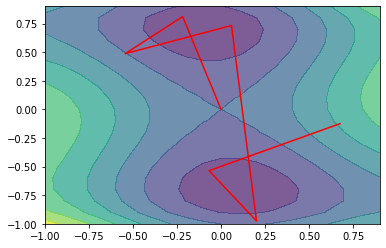

In [201]:
plotDoubleLoop12_new([1,1], thres= 10^(-3))

In [205]:
def doubleLoop12_again( x0, thres, maxSteps=100):
    x_path=np.zeros(maxSteps)
    y_path=np.zeros(maxSteps)
    x_path[0]=x0[0]
    y_path[0]=x0[1]
    x_0 = x0
    
    for i in range(0,maxSteps):
        alpha = 1
        if abs(np.linalg.norm( grad12(x_0[0],x_0[1]))) < thres:
            return x_path[0:i], y_path[0:i]
        else:
            x_k = x_0-alpha*grad12(x_0[0],x_0[1])
            while f12(x_k[0], x_k[1]) > f(x_0[0], x_0[1]):
                alpha = alpha/2
                x_k = x_0-alpha*grad12(x_0[0],x_0[1])
            x_0 = x_k
            #print('Step size of this iteration:', alpha)
            x_path[i]=x_k[0]
            y_path[i]=x_k[1]    
            
    ## if we get all the way outside the for loop it means we've developed
    # maxSteps iteration, we need to fix a stop for the machine to not have
    # an infinite loop
    
    print('The method has not converged after' +str(maxSteps)+ ' iterations.\n')
    print('The last values reached are', x_path, y_path)
            
    return x_path, y_path

In [206]:
def plotDoubleLoop12_again(x0, thres, maxSteps=100):
    if x0[0] == 0:
        x=np.arange(-1,1, 0.1)
        y=np.arange(-abs(x0[1]),abs(x0[1]), 0.1)
    elif x0[1] == 0:
        x=np.arange(-abs(x0[0]),abs(x0[0]), 0.1)
        y=np.arange(-1,1, 0.1)
    else: 
        x=np.arange(-abs(x0[0]),abs(x0[0]), 0.1)
        y=np.arange(-abs(x0[1]),abs(x0[1]), 0.1)
    X, Y = pylab.meshgrid(x,y)
    Z= f12(X,Y)
    x_path, y_path = doubleLoop12_again(x0, thres, maxSteps)
    plt.contourf(X, Y, Z, alpha= .7)
    plt.plot(x_path, y_path, 'r')
    print(x_path[-1], y_path[-1])

The method has not converged after100 iterations.

The last values reached are [ 6.75000000e-01 -6.79645850e-02  2.01290409e-01  5.94401922e-02
 -5.43808576e-01 -2.17805544e-01  2.05115976e-01 -1.61897659e-01
  2.40660174e-01 -2.44872531e-01 -6.59962419e-02 -2.49596604e-01
  3.13356655e-01 -3.91528195e-01  4.84142700e-01  2.45798440e-01
 -2.73033609e-01  8.49636965e-02 -1.27254334e-01  4.26431419e-01
  1.35344350e-01 -1.48345141e-01  4.05602046e-02 -2.86716337e-01
  4.58044458e-01 -3.04802694e-01  1.63466765e-01 -3.86116746e-01
  3.81193017e-01 -4.75477153e-01  2.24848784e-02  1.07767436e-01
  1.45593716e-01 -1.21751594e-01  2.89709260e-04  1.75911246e-02
  3.56198309e-02  3.17496174e-01 -4.08064521e-01  6.61194090e-02
 -1.55112786e-01  1.24926677e-02  2.12619241e-01 -2.46595811e-01
 -8.47659067e-02 -2.10505993e-01  4.11213439e-01 -3.06263485e-01
  1.70193446e-01 -3.81005340e-01  3.07909617e-01 -1.58495692e-01
  3.92036917e-01 -4.59865206e-01 -1.50761711e-01  2.67947899e-01
  2.1055765

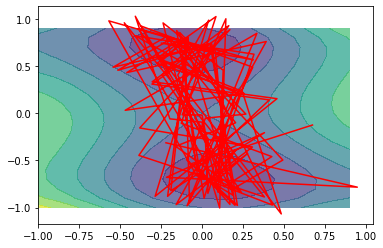

In [207]:
plotDoubleLoop12_again([1,1], thres= 10^(-3))

In [183]:
# Backtracking algorithm with a double loop 
## new
def doubleLoop12_recu( x0, thres, alpha=1, maxSteps=100):
    x_path=np.zeros(maxSteps)
    y_path=np.zeros(maxSteps)
    x_path[0]=x0[0]
    y_path[0]=x0[1]
    x_0 = x0
    for i in range(0,maxSteps):
        print('Iteration', i)
        #alpha = 1
        x_k = x_0-alpha*grad12(x_0[0],x_0[1])
        print('New value computed:', x_k, f12(x_k[0], x_k[1]))
        print('Old value computed:', x_0, f12(x_0[0], x_0[1]))
        ## Check if the proposed value of alpha reduces the value of f(x_k)
        if f12(x_k[0], x_k[1]) >= f(x_0[0], x_0[1]):
            ## Faré una funció recurrent que deixarà de fer el càlcul quan 
            # ja no es compleixi la condició establerte:
            x_k[0], x_k[1] = doubleLoop12(x0=x0, thres=thres, alpha = alpha/2, maxSteps = maxSteps)
        if abs(f12(x_k[0], x_k[1]) - f12(x_k[0], x_k[1]) < thres):
            return x_path[0:i], y_path[0:i]
        else:
            x_0 = x_k
            x_path[i]=x_k[0]
            y_path[i]=x_k[1]       
                
                
        
        
    ## if we get all the way outside the for loop it means we've developed
    # maxSteps iteration, we need to fix a stop for the machine to not have
    # an infinite loop
    
    print('The method has not converged after' +str(maxSteps)+ ' iterations.\n')
    print('The last values reached are', x_path, y_path)
        
    return x_path, y_path


In [184]:
def plotDoubleLoop12_recu(x0, thres, maxSteps=100):
    if x0[0] == 0:
        x=np.arange(-1,1, 0.1)
        y=np.arange(-abs(x0[1]),abs(x0[1]), 0.1)
    elif x0[1] == 0:
        x=np.arange(-abs(x0[0]),abs(x0[0]), 0.1)
        y=np.arange(-1,1, 0.1)
    else: 
        x=np.arange(-abs(x0[0]),abs(x0[0]), 0.1)
        y=np.arange(-abs(x0[1]),abs(x0[1]), 0.1)
    X, Y = pylab.meshgrid(x,y)
    Z= f12(X,Y)
    x_path, y_path = doubleLoop12_recu(x0 = x0, thres= thres, alpha=1, maxSteps= maxSteps)
    plt.contourf(X, Y, Z, alpha= .7)
    plt.plot(x_path, y_path, 'r')
    print(x_path[-1], y_path[-1])

In [185]:
plotDoubleLoop12_recu([3,3], 10^(-3))

## buscar si es poden fer funcions recurrents amb python

Iteration 0
New value computed: [-283.2 -408. ] 172061610290498.97
Old value computed: [3, 3] 405.9


TypeError: doubleLoop12() got an unexpected keyword argument 'alpha'